#### 目录
* 原题描述   621.任务调度器
* 第一遍解法 
* 网上解法
* 优化自己的代码
* 第二遍解法 

#### 1. 问题描述

给定一个用字符数组表示的 CPU 需要执行的任务列表。其中包含使用大写的 A - Z 字母表示的26 种不同种类的任务。任务可以以任意顺序执行，并且每个任务都可以在 1 个单位时间内执行完。CPU 在任何一个单位时间内都可以执行一个任务，或者在待命状态。

然而，两个相同种类的任务之间必须有长度为 n 的冷却时间，因此至少有连续 n 个单位时间内 CPU 在执行不同的任务，或者在待命状态。

你需要计算完成所有任务所需要的最短时间。

* 示例 1：

>输入: tasks = ["A","A","A","B","B","B"], n = 2 
输出: 8    
执行顺序: A -> B -> (待命) -> A -> B -> (待命) -> A -> B.


#### 2、我的第一次解法 12.25

**2.1 思路**

思路1

* 按n个数进行分组，

* 遍历任务，两个相同的任务间隔n个数

思路2

*  选出出现次数最多的任务，如果n*任务数 > 总任务数，则分组就是n个分组，最后一个分组只有一个任务

* 


**2.2 代码尝试**


In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int: 
        task = {}
        for key in  tasks:
            task[key] = task.get(key, 0) + 1
        task = sorted(task.items(),key = lambda item:item[1])    
        print(n * task[0][1])
        if n * task[0][1] > len(tasks):
            return((n-1)*n*task[1][0]+1)
        
        

**2.3 正确代码解析**


* 解法一

**计数**

完成所有任务的最短时间取决于**出现次数最多的任务数量。**

https://leetcode-cn.com/problems/task-scheduler/solution/python-xiang-jie-by-jalan/


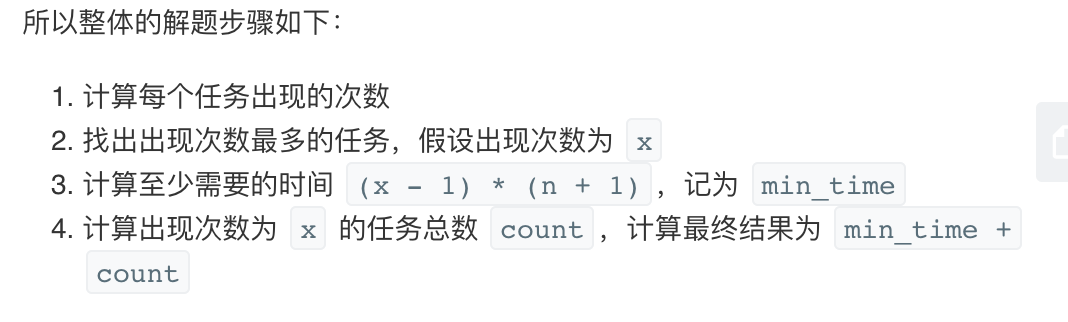


```python

class Solution(object):
    def leastInterval(self, tasks, n):
        """
        :type tasks: List[str]
        :type n: int
        :rtype: int
        """
        length = len(tasks)
        if length <= 1:
            return length
        
        # 用于记录每个任务出现的次数
        task_map = dict()
        for task in tasks:
            task_map[task] = task_map.get(task, 0) + 1
        # 按任务出现的次数从大到小排序
        task_sort = sorted(task_map.items(), key=lambda x: x[1], reverse=True)
        
        # 出现最多次任务的次数
        max_task_count = task_sort[0][1]
        # 至少需要的最短时间
        res = (max_task_count - 1) * (n + 1)
        
        for sort in task_sort:
            if sort[1] == max_task_count:
                res += 1
        
        # 如果结果比任务数量少，则返回总任务数
        return res if res >= length else length


```

* 解法二

**分桶**

思路和解法一的思路是一致的，只是表达方式不同，解法二的代码更加简洁而已

我们设计桶的大小为 n+1，则相同的任务恰好不能放入同一个桶，最密也只能放入相邻的桶。

对于重复的任务，我们只能将每个都放入不同的桶中，因此桶的个数就是重复次数最多的任务的个数。

一个桶不管是否放满，其占用的时间均为 n+1，这是因为后面桶里的任务需要等待冷却时间。最后一个桶是个特例，由于其后没有其他任务需等待，所以占用的时间为桶中的任务个数。

最终我们得到：

* 总排队时间 = (桶个数 - 1) * (n + 1) + 最后一桶的任务数

``` python


from collections import Counter

class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        ct = Counter(tasks)
        nbucket = ct.most_common(1)[0][1] ##返回出现次数最多的任务的次数 
        last_bucket_size = list(ct.values()).count(nbucket) ##返回出现最多的次数 的任务数
        res = (nbucket - 1) * (n + 1) + last_bucket_size
        return max(res, len(tasks))

```

**2.4 我的代码改进**
#### 3、相关知识讲解

In [7]:
from collections import Counter
Counter('abracadabra').most_common(3)

[('a', 5), ('b', 2), ('r', 2)]